# Model Training

In [4]:
# basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# modelling
from sklearn.metrics import mean_absolute_error ,mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression , Ridge , Lasso 
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

# Import csv data as pandas df

In [5]:
df = pd.read_csv('S:/ml resources/data.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
x = df.drop(columns=['math_score'] ,axis=1)

In [8]:
y = df['math_score']

In [11]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
[
    ('OneHotEncoder' , oh_transformer , cat_features),
    ('StandarScaler' , numerical_transformer , num_features),
]
)

In [12]:
x = preprocessor.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape , x_test.shape

((700, 19), (300, 19))

# create and evaluate metrics

In [24]:
def evaluate_metric(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true ,predicted)
    return mae , rmse , r2_square

In [31]:
models={
    'LinearRegression' : LinearRegression(),
    'lasso' : Lasso(),
    'ridge' : Ridge(),
    'kneighbor ': KNeighborsRegressor(),
    'DecisionTreeRegressor' :  DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'CatBoost' : CatBoostRegressor(verbose= False),
    'XGBoost': XGBRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor() 
}

model_list=[]
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    # model predicted
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    
    # evaluate 
    model_train_mae ,model_train_rmse ,model_train_r2_score = evaluate_metric(y_train,y_train_predict)
    model_test_mae ,model_test_rmse ,model_test_r2_score = evaluate_metric(y_test,y_test_predict)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training set")
    print(" - root mean squared error {:.4f}".format(model_train_rmse))
    print(" - mean absolute error {:.4f}".format(model_train_mae))
    print(" - r2 score for training {:.4f}".format(model_train_r2_score))
    
    print("--------------------------------------")
    
    print("Model performance for testing set")
    print(" - root mean squared error {:.4f}".format(model_test_rmse))
    print(" - mean absolute error {:.4f}".format(model_test_mae))
    print(" - r2 score for training {:.4f}".format(model_test_r2_score))
    r2_list.append(model_test_r2_score)
    
    print('='*35)
    print('\n')    

LinearRegression
Model performance for training set
 - root mean squared error 5.2483
 - mean absolute error 4.1985
 - r2 score for training 0.8751
--------------------------------------
Model performance for testing set
 - root mean squared error 5.5576
 - mean absolute error 4.4183
 - r2 score for training 0.8759


lasso
Model performance for training set
 - root mean squared error 6.5106
 - mean absolute error 5.1582
 - r2 score for training 0.8078
--------------------------------------
Model performance for testing set
 - root mean squared error 6.8705
 - mean absolute error 5.3929
 - r2 score for training 0.8103


ridge
Model performance for training set
 - root mean squared error 5.2487
 - mean absolute error 4.1977
 - r2 score for training 0.8751
--------------------------------------
Model performance for testing set
 - root mean squared error 5.5566
 - mean absolute error 4.4155
 - r2 score for training 0.8759


kneighbor 
Model performance for training set
 - root mean square

# Results

In [41]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,ridge,0.875907
0,LinearRegression,0.875863
6,CatBoost,0.852108
5,RandomForestRegressor,0.850792
7,XGBoost,0.842395
8,AdaBoost Regressor,0.830739
1,lasso,0.810281
3,kneighbor,0.773797
4,DecisionTreeRegressor,0.741490


# Linear Regression

In [45]:
lin_model= LinearRegression(fit_intercept=False)
lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score= r2_score(y_test, y_pred)*100
print("Accuracy of linear model is :",score)

Accuracy of linear model is : 87.5863044301674


Text(0, 0.5, 'predicted')

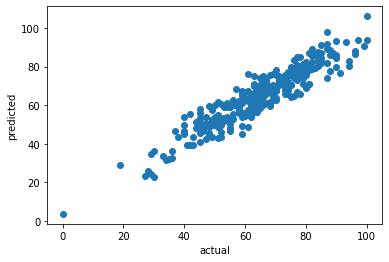

In [48]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')

<AxesSubplot:xlabel='math_score'>

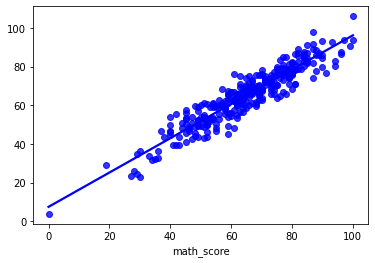

In [49]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='blue')

# Difference between Actual and predicted

In [52]:
pref_df = pd.DataFrame({'Actual value':y_test , 'Predicted_value':y_pred , 'Difference between values':y_test-y_pred})
pref_df

,Actual value,Predicted_value,Difference between values
521,91,76.511652,14.488348
737,53,58.898180,-5.898180
740,80,76.938478,3.061522
660,74,76.965881,-2.965881
411,84,87.633152,-3.633152
...,...,...,...
468,77,72.854766,4.145234
935,70,62.606548,7.393452
428,65,58.650347,6.349653
7,40,44.841375,-4.841375
